Loading road network...
Loaded: 66106 nodes, 170412 edges

Plot 1: Basic Road Network


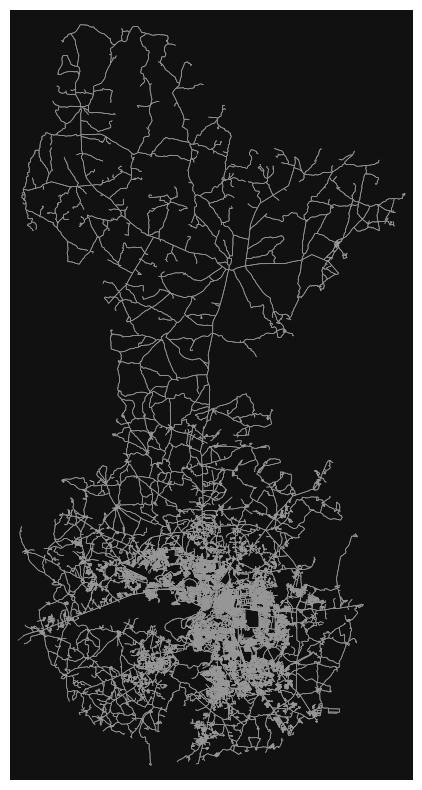


Converting to DataFrames...

Nodes shape: (66106, 6)
Edges shape: (170412, 15)

Plot 2: Road Types


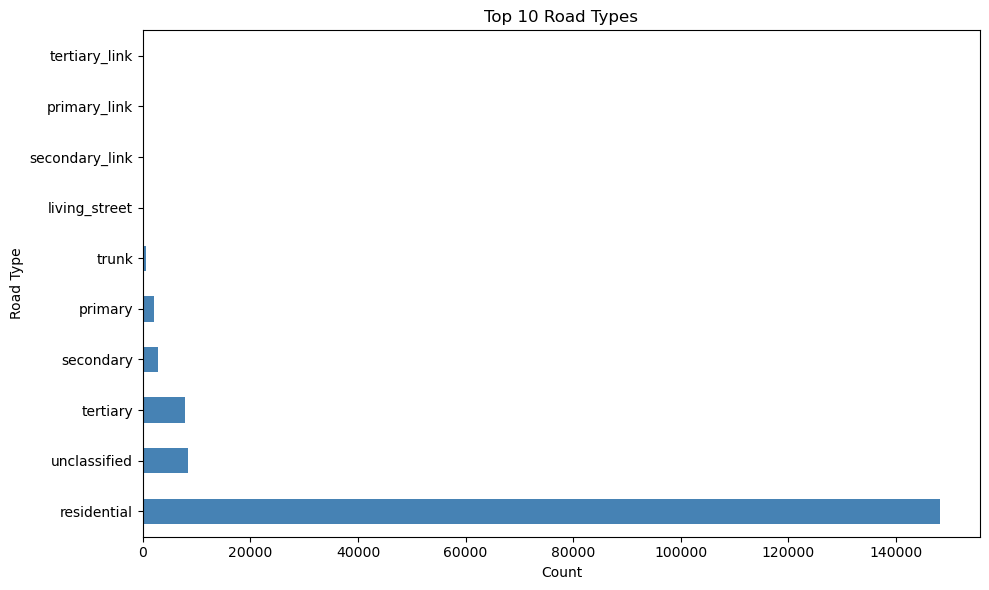


Road type counts:
road_type
residential       148193
unclassified        8366
tertiary            7837
secondary           2782
primary             2141
trunk                502
living_street        162
secondary_link       123
primary_link         110
tertiary_link         77
Name: count, dtype: int64

Plot 3: Road Lengths


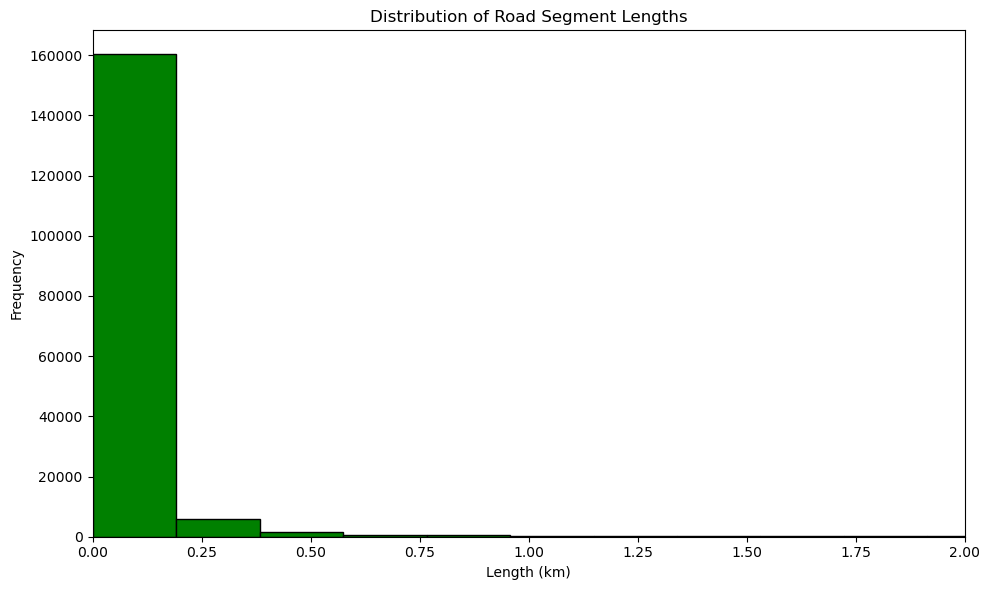


Total road length: 14874.63 km
Average segment length: 0.087 km

Plot 4: Intersection Analysis


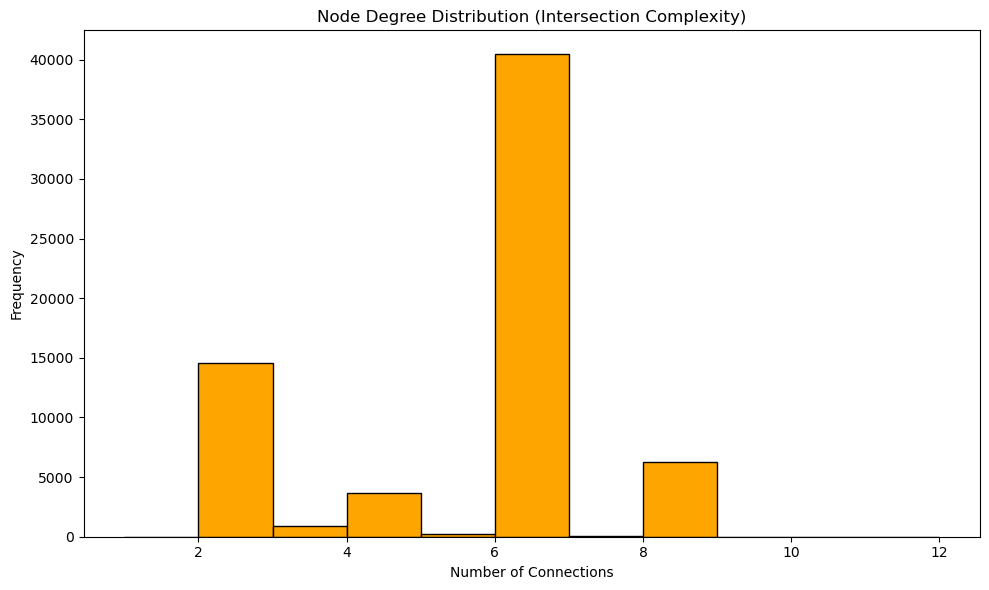


Average connections per node: 5.16
Dead ends (1 connection): 4
Major intersections (4+ connections): 50652

NETWORK SUMMARY
Nodes: 66,106
Edges: 170,412
Total Length: 14874.63 km
Average Degree: 5.16


In [15]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd

# ============================================
# 1. LOAD THE ROAD NETWORK
# ============================================
print("Loading road network...")
place_name = "Bhopal, Madhya Pradesh, India" 
graph = ox.graph_from_place(place_name, network_type='drive')

print(f"Loaded: {len(graph.nodes())} nodes, {len(graph.edges())} edges")

# ============================================
# 2. BASIC PLOT
# ============================================
print("\nPlot 1: Basic Road Network")
fig, ax = ox.plot_graph(graph, figsize=(10, 10), 
                        node_size=0, edge_linewidth=0.5)
plt.show()

# ============================================
# 3. GET DATA AS DATAFRAMES
# ============================================
print("\nConverting to DataFrames...")
nodes, edges = ox.graph_to_gdfs(graph)

print(f"\nNodes shape: {nodes.shape}")
print(f"Edges shape: {edges.shape}")

# ============================================
# 4. ROAD TYPES
# ============================================
print("\nPlot 2: Road Types")

# Extract highway types
edges['road_type'] = edges['highway'].apply(
    lambda x: x[0] if isinstance(x, list) else x
)

# Count and plot
road_counts = edges['road_type'].value_counts().head(10)

plt.figure(figsize=(10, 6))
road_counts.plot(kind='barh', color='steelblue')
plt.xlabel('Count')
plt.ylabel('Road Type')
plt.title('Top 10 Road Types')
plt.tight_layout()
plt.show()

print("\nRoad type counts:")
print(road_counts)

# ============================================
# 5. ROAD LENGTHS
# ============================================
print("\nPlot 3: Road Lengths")

edges['length_km'] = edges['length'] / 1000

plt.figure(figsize=(10, 6))
plt.hist(edges['length_km'], bins=50, color='green', edgecolor='black')
plt.xlabel('Length (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Road Segment Lengths')
plt.xlim(0, 2)  # Focus on 0-2 km
plt.tight_layout()
plt.show()

print(f"\nTotal road length: {edges['length_km'].sum():.2f} km")
print(f"Average segment length: {edges['length_km'].mean():.3f} km")

# ============================================
# 6. NODE DEGREES (INTERSECTIONS)
# ============================================
print("\nPlot 4: Intersection Analysis")

# Calculate degrees
degrees = dict(graph.degree())
nodes['degree'] = nodes.index.map(degrees)

plt.figure(figsize=(10, 6))
plt.hist(nodes['degree'], bins=range(1, nodes['degree'].max()+1), 
         color='orange', edgecolor='black')
plt.xlabel('Number of Connections')
plt.ylabel('Frequency')
plt.title('Node Degree Distribution (Intersection Complexity)')
plt.tight_layout()
plt.show()

print(f"\nAverage connections per node: {nodes['degree'].mean():.2f}")
print(f"Dead ends (1 connection): {len(nodes[nodes['degree']==1])}")
print(f"Major intersections (4+ connections): {len(nodes[nodes['degree']>=4])}")

# ============================================
# 7. SIMPLE SUMMARY
# ============================================
print("\n" + "="*50)
print("NETWORK SUMMARY")
print("="*50)
print(f"Nodes: {len(nodes):,}")
print(f"Edges: {len(edges):,}")
print(f"Total Length: {edges['length_km'].sum():.2f} km")
print(f"Average Degree: {nodes['degree'].mean():.2f}")
print("="*50)